In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#rota = '/content/drive/MyDrive/22_Programacao/Colab Notebooks/DataSciense/PS_2023_Exoplanets.csv'
rota = 'https://raw.githubusercontent.com/Paulo-de-Souza/DataSciense/main/Exoplanets/PS_2023_Exoplanets.csv'
df = pd.read_csv(rota,header=100)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35086 entries, 0 to 35085
Data columns (total 92 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          35086 non-null  object 
 1   hostname         35086 non-null  object 
 2   default_flag     35086 non-null  int64  
 3   sy_snum          35086 non-null  int64  
 4   sy_pnum          35086 non-null  int64  
 5   discoverymethod  35086 non-null  object 
 6   disc_year        35086 non-null  int64  
 7   disc_facility    35086 non-null  object 
 8   soltype          35086 non-null  object 
 9   pl_controv_flag  35086 non-null  int64  
 10  pl_refname       35086 non-null  object 
 11  pl_orbper        32017 non-null  float64
 12  pl_orbpererr1    30682 non-null  float64
 13  pl_orbpererr2    30681 non-null  float64
 14  pl_orbperlim     32017 non-null  float64
 15  pl_orbsmax       19407 non-null  float64
 16  pl_orbsmaxerr1   5113 non-null   float64
 17  pl_orbsmaxer

In [ ]:
df1 = df.drop(['disc_facility','pl_controv_flag','soltype','pl_refname','sy_refname','rowupdate','pl_pubdate','releasedate','st_refname'],axis=1)
df1.head(10)

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,pl_orbper,pl_orbpererr1,pl_orbpererr2,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,75 Cet c,75 Cet,1,2,2,Radial Velocity,2023,2051.620000,45.980000,-40.470000,...,-0.72365,5.35320,0.023,-0.023,3.207,0.272,-0.272,5.09343,0.003932,-0.003932
1,AF Lep b,AF Lep,0,1,1,Imaging,2023,7520.000000,1200.000000,-1300.000000,...,-0.01880,6.33200,0.035,-0.035,4.926,0.021,-0.021,6.18644,0.001140,-0.001140
2,AF Lep b,AF Lep,1,1,1,Imaging,2023,8030.000000,1800.000000,-1800.000000,...,-0.01880,6.33200,0.035,-0.035,4.926,0.021,-0.021,6.18644,0.001140,-0.001140
3,AF Lep b,AF Lep,0,1,1,Imaging,2023,9060.000000,3650.000000,-2480.000000,...,-0.01880,6.33200,0.035,-0.035,4.926,0.021,-0.021,6.18644,0.001140,-0.001140
4,BD-210397 b,BD-210397,1,1,2,Radial Velocity,2023,1891.000000,56.000000,-48.000000,...,-0.02270,9.84000,0.030,-0.030,6.504,0.018,-0.018,9.25962,0.000826,-0.000826
5,BD-210397 c,BD-210397,1,1,2,Radial Velocity,2023,6240.000000,151.000000,-156.000000,...,-0.02270,9.84000,0.030,-0.030,6.504,0.018,-0.018,9.25962,0.000826,-0.000826
6,BD-210397 c,BD-210397,0,1,2,Radial Velocity,2023,6360.000000,6260.000000,-711.000000,...,-0.02270,9.84000,0.030,-0.030,6.504,0.018,-0.018,9.25962,0.000826,-0.000826
7,DMPP-4 b,DMPP-4,1,1,1,Radial Velocity,2023,3.498200,0.002200,-0.232700,...,-0.03800,5.72936,0.023,-0.023,4.494,0.018,-0.018,5.60037,0.001405,-0.001405
8,EPIC 229004835 b,EPIC 229004835,1,1,1,Transit,2023,16.141132,0.000019,-0.000019,...,-0.86600,10.23000,0.006,-0.006,8.725,0.023,-0.023,10.04940,0.000421,-0.000421
9,EPIC 229004835 b,EPIC 229004835,0,1,1,Transit,2023,16.136550,0.001680,-0.001820,...,-0.86600,10.23000,0.006,-0.006,8.725,0.023,-0.023,10.04940,0.000421,-0.000421


### IDENTIFICANDO O NÚMERO TOTAL DE EXOPLANETAS

In [ ]:
df1 = df1[df1['default_flag']!=0]
print(f'O Numero Total de Exoplanetas é: {df1.shape[0]}')

O Numero Total de Exoplanetas é: 5523


### ANOS EM QUE OS EXOPLANETAS FORAM ENCONTRADOS

In [ ]:
anos_descoberta = df1['disc_year'].unique()
anos_descoberta


array([2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013,
       2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002,
       2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1992])

### QUANTIDADE DE PLANETAS ENCONTRADOS POR ANO

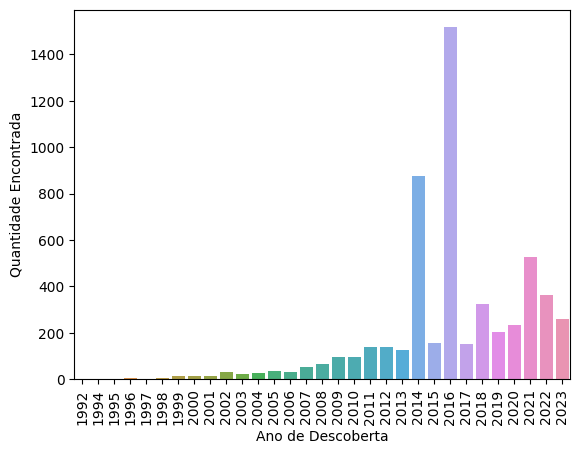

In [ ]:
sns.barplot(x=df1['disc_year'].value_counts().index,y=df1['disc_year'].value_counts())
plt.xticks(rotation=90)
plt.xlabel('Ano de Descoberta')
plt.ylabel('Quantidade Encontrada')
plt.show()

## FORMAS DE DETECÇÃO DO EXOPLANETAS

### FORMA COMO EXOPLANETA FOI DETECTADO

In [ ]:
metodo_detec = df1['discoverymethod'].unique()
metodo_detec

array(['Radial Velocity', 'Imaging', 'Transit', 'Microlensing',
       'Transit Timing Variations', 'Astrometry',
       'Eclipse Timing Variations', 'Orbital Brightness Modulation',
       'Disk Kinematics', 'Pulsar Timing', 'Pulsation Timing Variations'],
      dtype=object)

### QUANTIDADE DE EXOPLANETAS ENCONTRADOS POR MÉTODO

In [ ]:
df1['discoverymethod'].value_counts()

Transit                          4122
Radial Velocity                  1065
Microlensing                      204
Imaging                            69
Transit Timing Variations          25
Eclipse Timing Variations          17
Orbital Brightness Modulation       9
Pulsar Timing                       7
Astrometry                          2
Pulsation Timing Variations         2
Disk Kinematics                     1
Name: discoverymethod, dtype: int64

In [ ]:
def metodo_detec(dm):
  if dm == 'Transit':
    return 'Transit'
  elif dm == 'Radial Velocity':
    return 'Radial Velocity'
  elif dm == 'Microlensing':
    return 'Microlensing'
  elif dm == 'Imaging':
    return 'Imaging'
  elif dm == 'Pulsar Timing':
    return 'Pulsar Timing'
  else:
    return 'Outro'

In [ ]:
df5 = df1.copy()
df5['metododetec'] = df5['discoverymethod'].apply(metodo_detec)

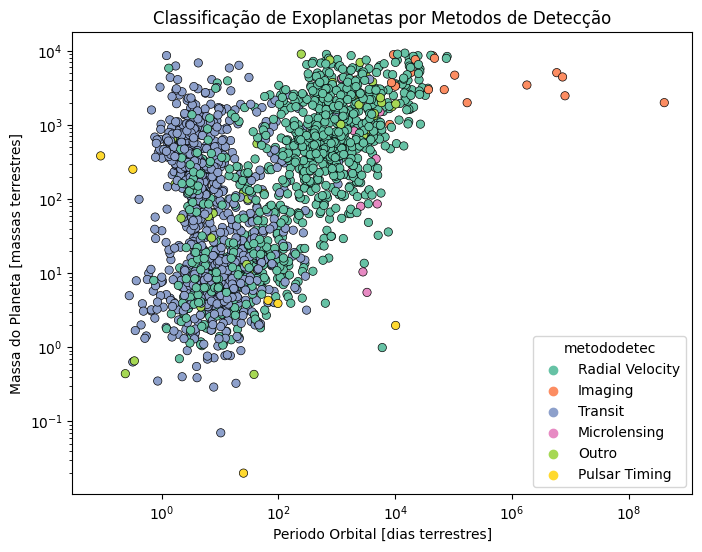

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(df5,x='pl_orbper',y='pl_bmasse',hue='metododetec',palette='Set2',edgecolor="black")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Periodo Orbital [dias terrestres]')
plt.ylabel('Massa do Planeta [massas terrestres]')
plt.title('Classificação de Exoplanetas por Metodos de Detecção')
plt.show()

In [ ]:
df1.columns

Index(['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum',
       'discoverymethod', 'disc_year', 'pl_orbper', 'pl_orbpererr1',
       'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1',
       'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1',
       'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2',
       'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2',
       'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1', 'pl_bmassjerr2',
       'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen', 'pl_orbeccenerr1',
       'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol', 'pl_insolerr1',
       'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2',
       'pl_eqtlim', 'ttv_flag', 'st_spectype', 'st_teff', 'st_tefferr1',
       'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2',
       'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim',
       'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim', 'st_met

## Distribuição Geral do Exoplanetas


### Pela Declinação (dec) e Ascensão Reta (ra)

<Axes: xlabel='ra', ylabel='dec'>

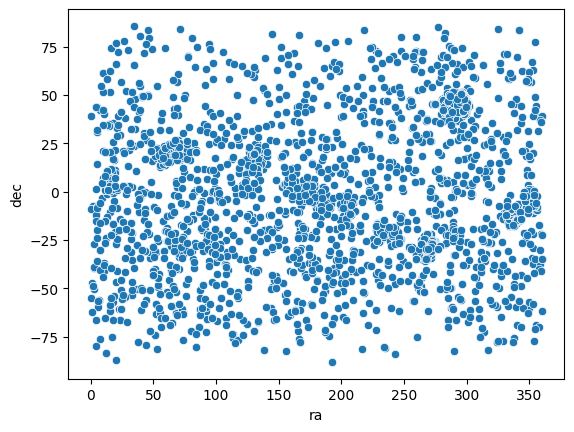

In [ ]:
sns.scatterplot(df1,x='ra',y='dec')

### Pelo Raio do Planeta [Raios da Terra] e a Orbita do Semi-eixo Mario [au]

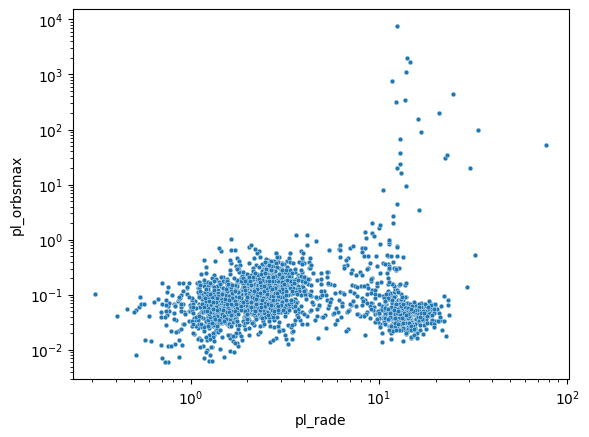

In [ ]:
sns.scatterplot(x=df1['pl_rade'],y=df1['pl_orbsmax'],s=12)
plt.xscale('log')
plt.yscale('log')
#plt.ticklabel_format(style='sci',scilimits=(-2,3),axis='y')
#plt.ylim((-2,1000))


### A classificação dos planetas por massa:

- Mercurianos : 0-0,1 massas terrestres
- Mini-Terras : 0,1-0.5 massas terrestres
- Terrestres : 0,5-2 massas terrestres
- Super-Terras : 2-10 massas terrestres
- Netunianos : 10- 30 massas terrestres
- Jupiterianos : 30 massas terrestres - 25 massas de Júpiter

In [ ]:
def classificacao_planeta(bmasse):
  if bmasse <= 0.1:
    return 'Mercuriano'
  elif bmasse <= 0.5:
    return 'Mini-Terra'
  elif bmasse <= 2:
    return 'Terrestre'
  elif bmasse <= 10:
    return 'Super-Terra'
  elif bmasse <= 50:
    return 'Netuniano'
  else:
    return 'Jupiteriano'

In [ ]:
df2 = df1.copy()
df2['class_planet'] = df2['pl_bmasse'].apply(classificacao_planeta)
df2['class_planet'].value_counts()

Jupiteriano    4666
Super-Terra     412
Netuniano       370
Terrestre        66
Mini-Terra        7
Mercuriano        2
Name: class_planet, dtype: int64

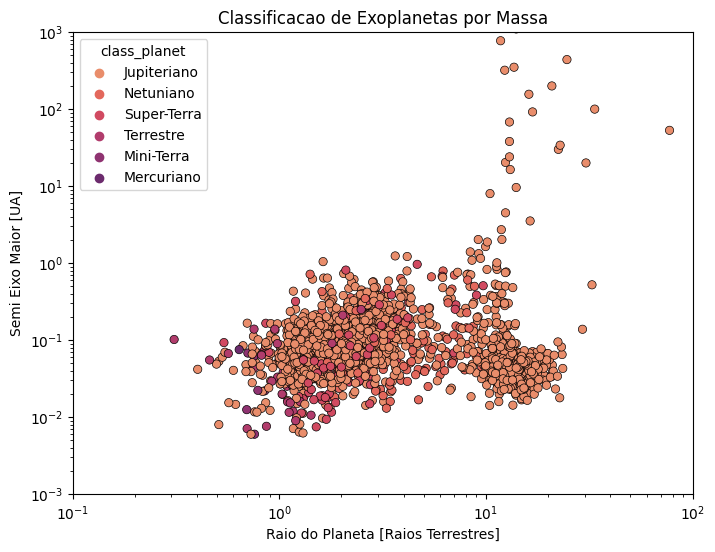

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df2['pl_rade'],y=df2['pl_orbsmax'],hue=df2['class_planet'],palette='flare',edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.xlim((0.1,100))
plt.ylim((0.001,1000))
plt.xlabel('Raio do Planeta [Raios Terrestres]')
plt.ylabel('Semi Eixo Maior [UA]')
plt.title('Classificacao de Exoplanetas por Massa')
plt.show()

<ipython-input-181-96176a659c9f>:19: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



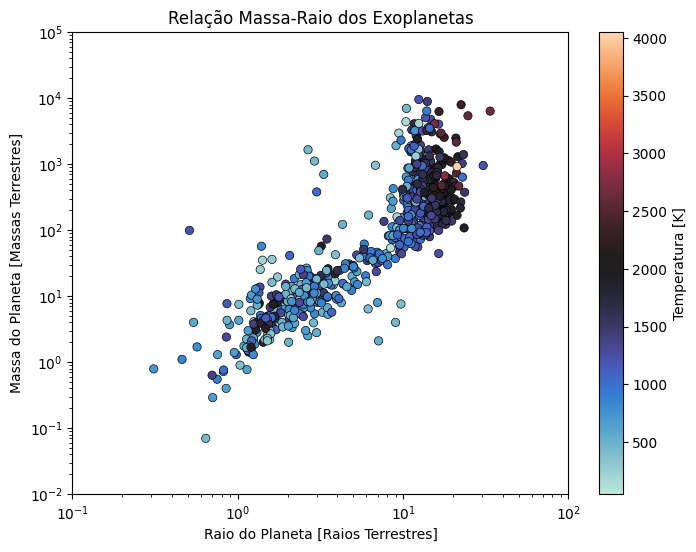

In [ ]:
# https://stackoverflow.com/questions/62884183/trying-to-add-a-colorbar-to-a-seaborn-scatterplot
plt.figure(figsize=(8,6))
# sns.scatterplot(x=df2['pl_rade'],y=df2['pl_bmasse'],hue=df2['class_planet'],palette='flare',edgecolor='black')
ax = sns.scatterplot(x=df2['pl_rade'],y=df2['pl_bmasse'],hue=df2['pl_eqt'],palette='icefire',edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.xlim((0.1,100))
plt.ylim((0.01,1e5))
plt.xlabel('Raio do Planeta [Raios Terrestres]')
plt.ylabel('Massa do Planeta [Massas Terrestres]')
plt.title('Relação Massa-Raio dos Exoplanetas')

norm = plt.Normalize(df2['pl_eqt'].min(), df2['pl_eqt'].max())
sm = plt.cm.ScalarMappable(cmap="icefire", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
ax.figure.colorbar(sm,label='Temperatura [K]')

plt.show()

### RETIRANDO PLANETAS JUPITERIANOS

In [ ]:
df3 = df2[df2['class_planet']!='Jupiteriano']
df3.head()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,pl_orbper,pl_orbpererr1,pl_orbpererr2,...,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,class_planet
7,DMPP-4 b,DMPP-4,1,1,1,Radial Velocity,2023,3.498200,0.002200,-0.232700,...,5.72936,0.023,-0.023,4.494,0.018,-0.018,5.60037,0.001405,-0.001405,Netuniano
8,EPIC 229004835 b,EPIC 229004835,1,1,1,Transit,2023,16.141132,0.000019,-0.000019,...,10.23000,0.006,-0.006,8.725,0.023,-0.023,10.04940,0.000421,-0.000421,Netuniano
11,GJ 1151 c,GJ 1151,1,1,1,Radial Velocity,2023,389.700000,5.400000,-6.500000,...,13.76000,0.200,-0.200,7.637,0.017,-0.017,11.69380,0.000459,-0.000459,Netuniano
12,GJ 328 c,GJ 328,1,1,2,Radial Velocity,2023,241.800000,1.300000,-1.700000,...,9.99000,0.100,-0.100,6.352,0.026,-0.026,9.28610,0.000382,-0.000382,Netuniano
13,GJ 367 c,GJ 367,1,1,3,Radial Velocity,2023,11.530100,0.007800,-0.007800,...,10.15300,0.044,-0.044,5.780,0.020,-0.020,9.15159,0.000650,-0.000650,Super-Terra


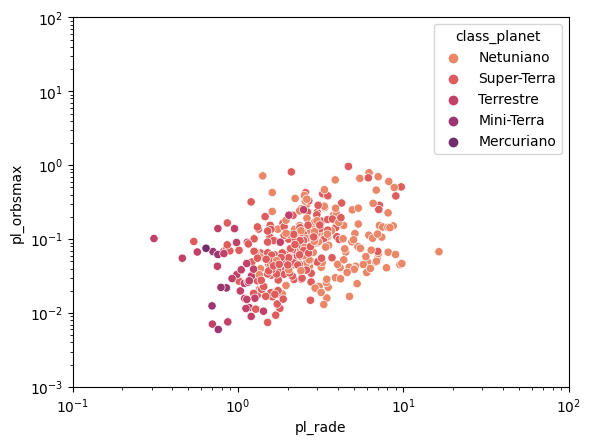

In [ ]:
sns.scatterplot(x=df3['pl_rade'],y=df3['pl_orbsmax'],hue=df3['class_planet'],palette='flare')
plt.xscale('log')
plt.yscale('log')
plt.xlim((0.1,100))
plt.ylim((0.001,100))
plt.show()

### MANTENDO OS PLANETAS COM INFORMACAO DE TEMPERATURA

In [ ]:
df4=df2[df2['pl_eqt'].isnull()==False]
df4=df4[df4['pl_rade'].isnull()==False]
df4.info()

In [ ]:
fig = px.scatter_3d(df4,x='pl_rade',y=df4['pl_orbsmax']/1000,z='pl_eqt',
                    color='pl_eqt',
                    color_continuous_scale=px.colors.sequential.Bluered_r,
                    size='pl_rade',
                    size_max=25,
                    labels={'pl_rade':"Raio [r_Terra]",
                           'y':'a Maior [10^3 UA]',
                           'pl_eqt':'Temperatura [K]'})

fig.update_layout(scene={"aspectratio": {"x": 5, "y": 2.5, "z": 2.5}})
fig.show()

In [ ]:
df7=df2[df2['pl_bmasse'].isnull()==False]
df7=df7[df7['class_planet']!='Jupiteriano']
df7.info()


In [ ]:
fig = px.scatter_3d(df7, x='sy_dist',  y='ra', z='dec',
                    color='class_planet',
                    color_discrete_sequence=px.colors.qualitative.G10,
                    size='pl_bmasse',
                    size_max=25,
                    title='Distribuicao de Planetas Nao Jupiterianos',)
fig.update_layout(scene={"aspectratio": {"x": 5, "y": 2.5, "z": 2.5}})
fig.show()

## PLANETAS HABITÁVEIS

Um planeta está em região habitável considerando alguns pontos:

1. **Conservative Sample of Potentially Habitable Exoplanets**
- Fluxo recebido: $0.36F_E <= F_{planeta} <= 1.1 F_E$
- Raio do Planeta: $0.5R_E <= R_{planeta} <= 1.6 R_E$
- Massa do Planeta: $0.1M_E <= M_{planeta} <= 3M_E$

2. **Optimistic Sample of Potentially Habitable Exoplanets**
- Fluxo recebido: $0.36F_E <= F_{planeta} <= 2.0 F_E$
- Raio do Planeta: $1.6R_E <= R_{planeta} <= 2.5 R_E$
- Massa do Planeta: $3M_E <= M_{planeta} <= 10M_E$

**Referências**
- [Habitable-Zone(NASA)](https://exoplanets.nasa.gov/search-for-life/habitable-zone/)
- [Catalogo de Planetas Habitaveis](https://phl.upr.edu/projects/habitable-exoplanets-catalog)
- [Vídeo Motivacional](https://youtu.be/7FcupdCCsbg?si=3ZQ-1RWskaWvwXbr)

In [ ]:
# Potenciais Habitaveis Conservativo+Otimista
ph = df2.copy()
ph = ph[(ph['pl_insol']>=0.36) & (ph['pl_insol']<=2.0)&(ph['pl_bmasse'].isnull()==False)]    #considerando o fluxo
ph = ph[(ph['pl_rade']>=0.50)  & (ph['pl_rade']<=2.5)]            #considerando o raio
ph = ph[(ph['pl_bmasse']>=0.1) & (ph['pl_bmasse']<=10)]
#ph.head(10)

In [ ]:
ph.info()

In [ ]:
fig = px.scatter(ph,x=ph['pl_insol'],y=ph['st_teff'],
           color='class_planet',
           size='pl_bmasse',
           size_max=80,
           width = 1200
           )
fig.update_xaxes(title = r'$\text{Fluxo no Planeta} \ [S_{\oplus}]$')
fig.update_yaxes(title = 'Temperatura Estelar [K]')

fig.show()

In [ ]:
fig = px.scatter_3d(ph, y=ph['pl_insol'],z=ph['st_teff'], x='pl_orbper',
                    color='class_planet',
                    color_discrete_sequence=px.colors.qualitative.G10,
                    size='pl_bmasse',
                    size_max=80,
                    width = 800,
                    title='Distribuicao de Planetas Nao Jupiterianos',
                    labels={'pl_insol':'Fluxo [S_Terra]',
                           'st_teff':'Temp. Estelar [K]',
                           'pl_orbper':'Periodo Orbital [Dias]'}
                    )
fig.update_layout(scene={"aspectratio": {"x": 5, "y": 2.5, "z": 2.5}})
fig.show()

### PLANETAS DESCOBERTOS EM 1998

In [ ]:
df1998 = df2[df2['disc_year']==1998]
df1998 = df1998.drop(['disc_year','default_flag'],axis=1)
df1998.head(15)

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,class_planet
34993,GJ 876 b,GJ 876,1,4,Radial Velocity,61.116600,0.008600,-0.008600,0.0,0.208317,...,10.16000,0.100,-0.100,5.010,0.021,-0.021,8.87530,0.001450,-0.001450,Jupiteriano
35001,HD 168443 b,HD 168443,1,2,Radial Velocity,58.111870,0.000240,-0.000180,0.0,0.292000,...,6.92122,0.023,-0.023,5.211,0.015,-0.015,6.73166,0.000327,-0.000327,Jupiteriano
35006,HD 187123 b,HD 187123,1,2,Radial Velocity,3.096583,0.000008,-0.000008,0.0,0.042600,...,7.83000,0.030,-0.030,6.337,0.016,-0.016,7.67284,0.000234,-0.000234,Jupiteriano
35010,HD 195019 b,HD 195019,2,1,Radial Velocity,18.201320,0.000390,-0.000390,0.0,0.140000,...,6.87591,0.023,-0.023,5.256,0.016,-0.016,6.72911,0.000247,-0.000247,Jupiteriano
35021,HD 210277 b,HD 210277,1,1,Radial Velocity,442.190000,0.500000,-0.500000,0.0,1.130000,...,6.54348,0.023,-0.023,4.799,0.020,-0.020,6.34701,0.000537,-0.000537,Jupiteriano
35026,HD 217107 b,HD 217107,1,2,Radial Velocity,7.126820,0.000039,-0.000039,0.0,0.080000,...,6.15500,0.005,-0.005,4.536,0.021,-0.021,5.96401,0.000388,-0.000388,Jupiteriano


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from math import pi

u=1.     #x-position of the center
v=0.5    #y-position of the center
a=2.     #radius on the x-axis
b=1.5    #radius on the y-axis

t = np.linspace(0, 2*pi, 10)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )
plt.grid(color='lightgray',linestyle='--')
for i in range(len(t)):
    x = u+a*np.cos(t[i])
    y = v+b*np.sin(t[i])

    # Mention x and y limits to define their range
    #plt.xlim(0, 100)
    #plt.ylim(0, 100)

    # Ploting graph
    plt.scatter(x, y, color = 'red')
    plt.pause(0.01)


In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# create a figure and axes
fig = plt.figure(figsize=(8,5))
#ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,1,1)

# set up the subplots as needed
#ax1.set_xlim(( 0, 2))
#ax1.set_ylim((-2, 2))
#ax1.set_xlabel('Time')
#ax1.set_ylabel('Magnitude')

ax2.set_xlim((-2,2))
ax2.set_ylim((-2,2))
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Plano Orbital')

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
#txt_title = ax1.set_title('')
#line1, = ax1.plot([], [], 'b', lw=2)     # ax.plot returns a list of 2D line objects
#line2, = ax1.plot([], [], 'r', lw=2)
pt1, = ax2.plot([], [], 'g.', ms=20)
line3, = ax2.plot([], [], 'y', lw=2)
plt.close()
#ax1.legend(['sin','cos']);

In [ ]:
# animation function. This is called sequentially
u=1.     #x-position of the center
v=0.5    #y-position of the center
a=2.     #radius on the x-axis
b=0.5    #radius on the y-axis
def drawframe(n):
    x = np.linspace(0, 2, 1000)
    y1 = b*np.sin(2 * np.pi * (x - 0.01 * n))
    y2 = a*np.cos(2 * np.pi * (x - 0.01 * n))
    line1.set_data(x, y1)
    line2.set_data(x, y2)
    line3.set_data(y1,y2)
    pt1.set_data(y1[0],y2[0])
    txt_title.set_text('Frame = {0:4d}'.format(n))
    return (line1,line2)

In [ ]:
from matplotlib import animation

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=20, blit=True)

<ipython-input-361-9139b08eef77>:13: MatplotlibDeprecationWarning:

Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later



In [ ]:
from IPython.display import HTML
HTML(anim.to_html5_video())

<ipython-input-361-9139b08eef77>:13: MatplotlibDeprecationWarning:

Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later



[exemplo_anim](https://colab.research.google.com/github/jckantor/CBE30338/blob/master/docs/A.03-Animation-in-Jupyter-Notebooks.ipynb#scrollTo=NPZ_AA6U6muF)